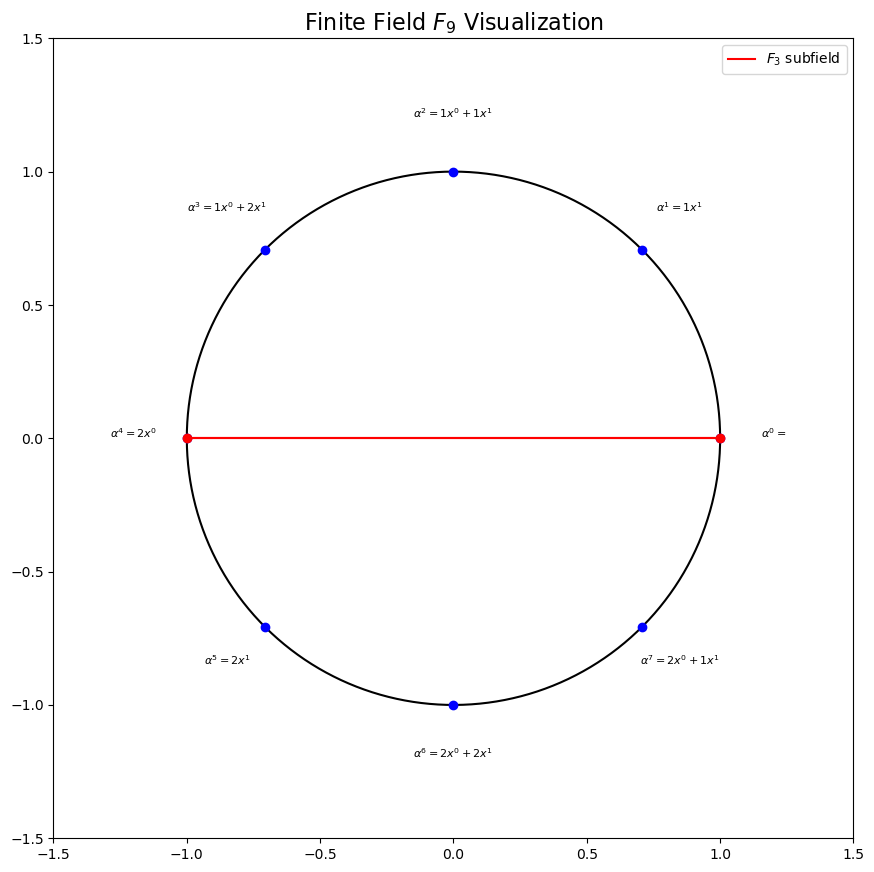

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_finite_field(q,output_filename=None):
    # Step 1: Compute the finite field F_q
    F = GF(q, repr="poly")  # Finite field of order q
    p = F.characteristic()  # Characteristic of the field
    r = F.degree()          # Degree of the extension

    # Step 2: Compute vector space representation and generator powers
    alpha = F.multiplicative_generator()  # Primitive element (generator)
    nonzero_elements = [a for a in F if a != 0]
    vector_representations = list(F)

    # Step 3: Map each element to a root of unity
    roots_of_unity = [exp(2 * pi * i * k / (q - 1)) for k in range(q-1)]

    # Step 4: Place roots of unity on a unit circle
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', adjustable='datalim')
    ax.plot(np.cos(np.linspace(0, 2*np.pi, 1000)), np.sin(np.linspace(0, 2*np.pi, 1000)), 'k-')  # Unit circle

    # Plot and label elements
    for k, (root, vector) in enumerate(zip(roots_of_unity, vector_representations)):
        x, y = root.real(), root.imag()
        ax.plot(x, y, 'bo')  # Point on the circle

        # Format vector as a sum of monomials
        vector_repr = " + ".join(f"{c}x^{i}" for i, c in enumerate(vector.polynomial().coefficients(sparse=False)) if c != 0)
        label = f"$\\alpha^{k} = {vector_repr}$"
        ax.text(x * 1.2, y * 1.2, label, fontsize=8, ha='center')

    # Step 5: Subfield F_p elements and connect them with a line
    subfield_elements = [alpha^(k*(q-1)//(p-1)) for k in range(p-1)]
    subfield_roots = [exp(2 * pi * i * k / (p-1)) for k in range(p-1)]
    subfield_points = [(root.real(), root.imag()) for root in subfield_roots]
    
    for x, y in subfield_points:
        ax.plot(x, y, 'ro')  # Subfield points in red
    subfield_x, subfield_y = zip(*subfield_points)
    ax.plot(subfield_x + (subfield_x[0],), subfield_y + (subfield_y[0],), 'r-', label=f"$F_{{{p}}}$ subfield")

    # Adjust bounding box and margins
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f"Finite Field $F_{{{q}}}$ Visualization", fontsize=16)
    ax.legend(loc='upper right')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

    # Save the image if an output filename is provided
    if output_filename:
        plt.savefig(output_filename, format='jpeg', dpi=int(300), bbox_inches='tight')
        
    plt.show()

# Example usage
plot_finite_field(9, output_filename="finite_field_9.jpeg")  # q = 9 = 3^2